In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

# Random forest
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import get_scorer_names




# Preprocessing

In [4]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()
titanic_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [7]:
# Replace null in Age
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [8]:
titanic_encoded =  pd.get_dummies(titanic_df, columns=['Sex'], drop_first=True)
titanic_encoded['Sex_male'] = titanic_encoded['Sex_male'].astype(int)
titanic_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


## Training data

In [9]:
X = titanic_encoded.drop(columns=['Survived'], axis=1)
y = titanic_encoded['Survived']

In [10]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size=0.2, 
                                                    random_state=42)

X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, 
                                                  test_size=0.2, random_state=42)


scale = MinMaxScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)
X_dev_scaled = scale.transform(X_dev)

## Decision tree

In [11]:
# Train decision tree - No pruning. 
# Model accuracy and predictions. 
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_dev_pred = model.predict(X_dev)

print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred):.2%}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_test_pred):.2%}')
print(f'Development Accuracy: {accuracy_score(y_dev, y_dev_pred):.2%}')
print('At depth:', model.tree_.max_depth)

Training Accuracy: 92.79%
Testing Accuracy: 77.09%
Development Accuracy: 77.62%
At depth: 18


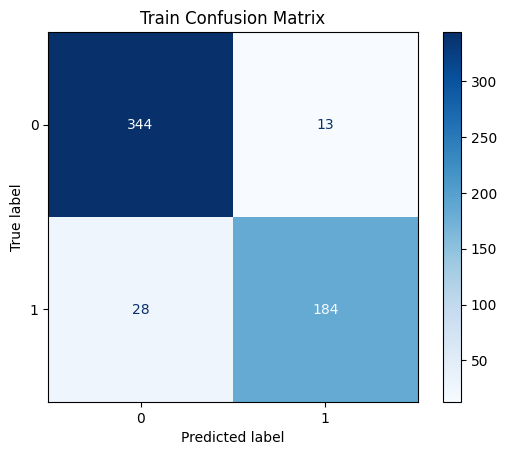

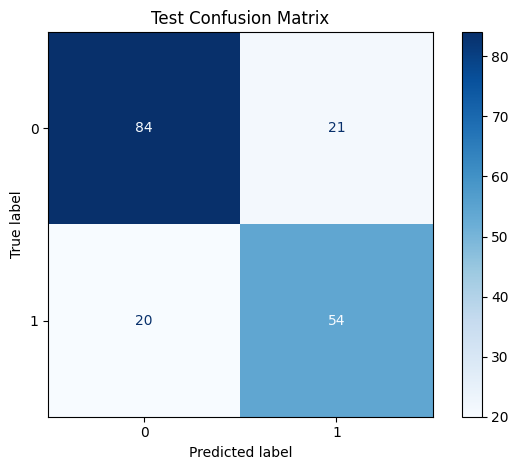

In [12]:
# Confusion matrix 
cm = confusion_matrix(y_train, y_train_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Train Confusion Matrix')

cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Test Confusion Matrix')
plt.tight_layout()

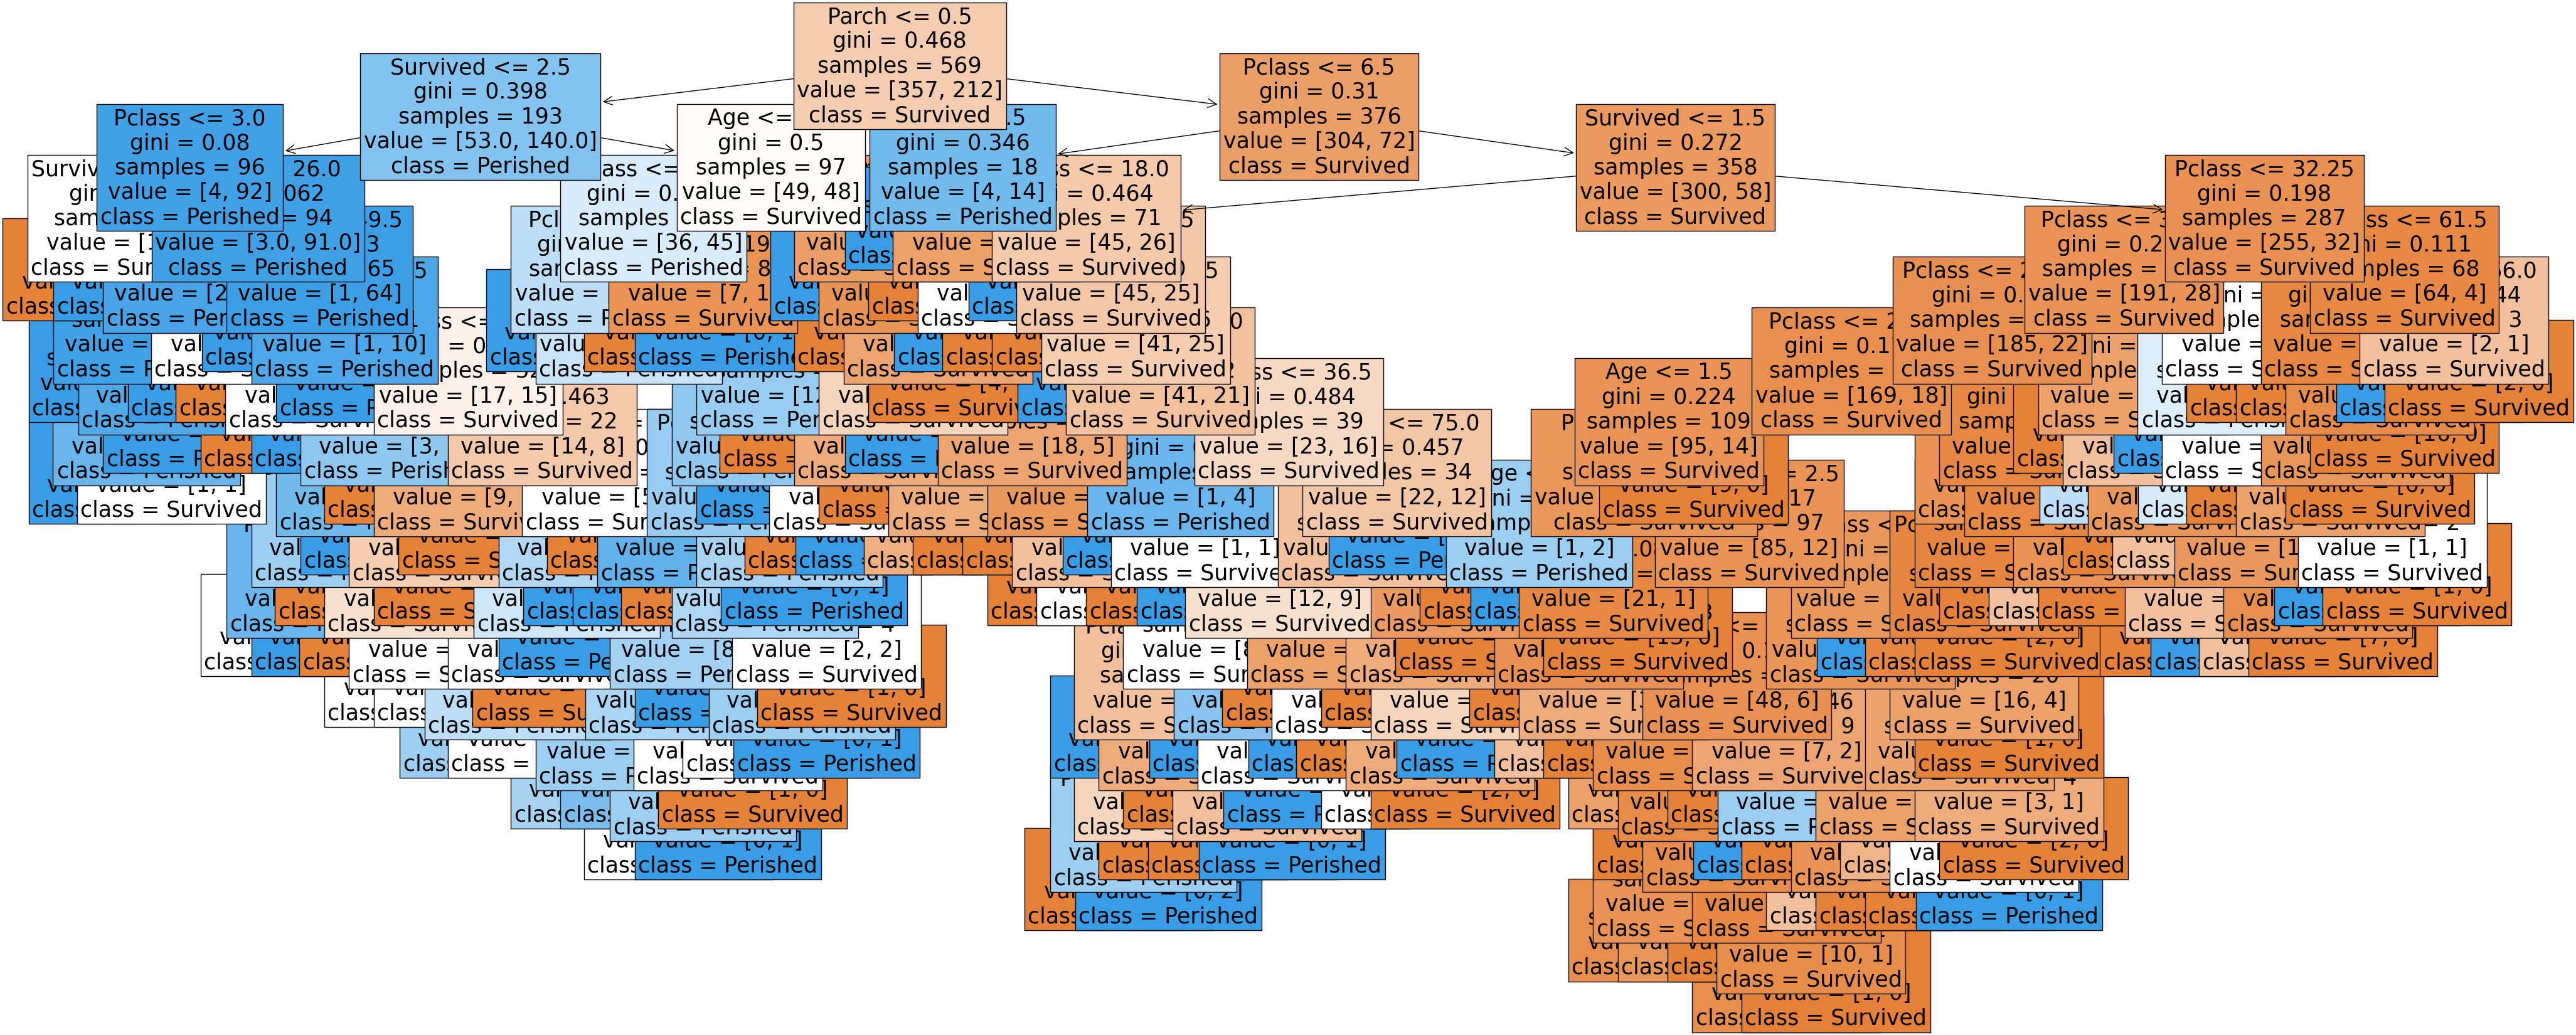

In [13]:
plt.figure(figsize=(50,20))
features = titanic_encoded.columns
classes = ['Survived','Perished']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True,fontsize=25)
plt.show()

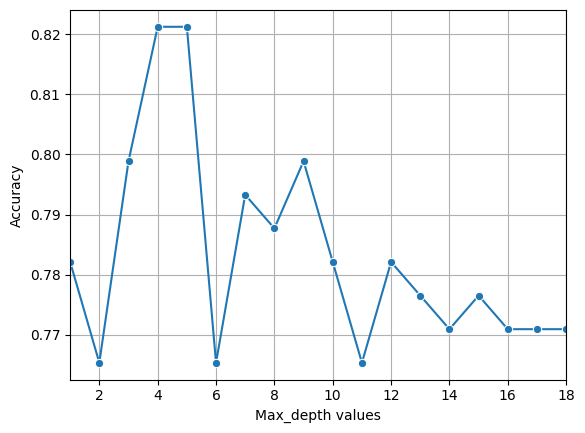

In [14]:
# Max depth pruning. Looking for best accuracy of modely at different depths.
pruned_depths = range(1,model.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=42)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

sns.lineplot(x=pruned_depths,y=pruned_scores, marker="o")
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
plt.xlim(1,18)
plt.grid(True)

In [15]:
# Identifying the accuracy at the most accurate depth for pruning.
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

pruned = DecisionTreeClassifier(criterion="entropy", max_depth=best_depth,
                                random_state=42,min_samples_leaf=2)

# Train Decision Tree Classifer
pruned.fit(X_train,y_train)

y_test_pred = pruned.predict(X_test)
y_train_pred = pruned.predict(X_train)
y_dev_pred = pruned.predict(X_dev)

print(f'Training Accuracy:{accuracy_score(y_train, y_train_pred):.2%}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_test_pred):.2%}')
print(f'Development Accuracy: {accuracy_score(y_dev, y_dev_pred):.2%}')

Best performance reached at depth of: 4
Training Accuracy:83.13%
Testing Accuracy: 81.01%
Development Accuracy: 80.42%


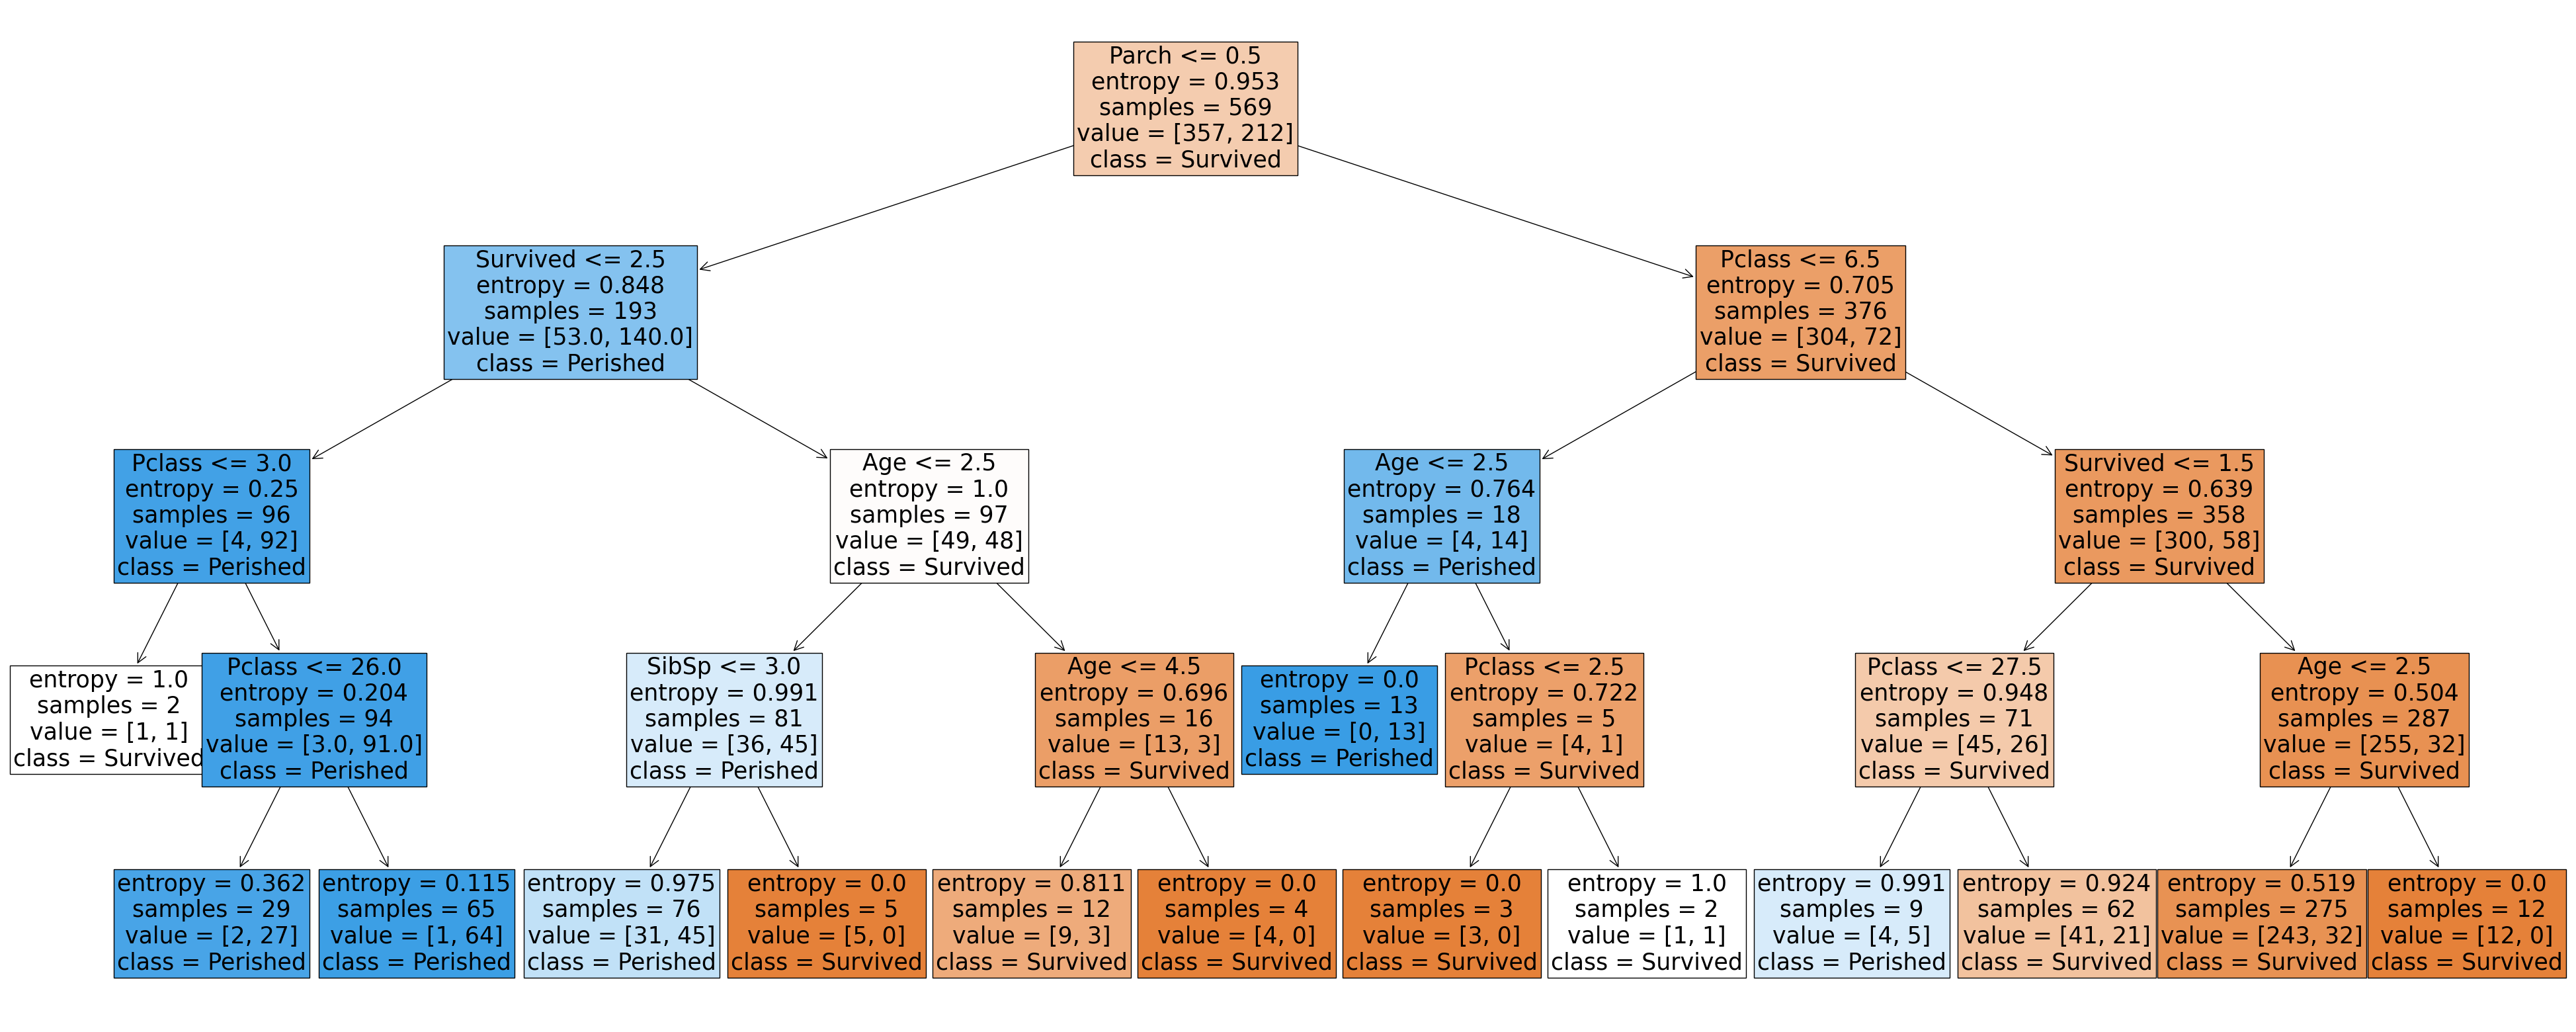

In [16]:
plt.figure(figsize=(50,20))
features = titanic_encoded.columns
classes = ['Survived','Perished']
tree.plot_tree(pruned,feature_names=features,class_names=classes,filled=True,fontsize=25)
plt.show()

In [ ]:
# Plot decision tree for each depth. 
max_depths = range(1, 18)  # Range of original depth of unpruned tree.

for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X, y)

    y_train_pred = model.predict(X_train)
    y_dev_pred = model.predict(X_dev)
    
    plt.figure(figsize=(50, 20))
    features = X.columns
    classes = ['Survived', 'Perished']
    plot_tree(model, feature_names=features, class_names=classes, filled=True, fontsize=25)
    plt.title(f'Decision Tree with max_depth={max_depth}', fontsize=30)
    plt.tight_layout()
    plt.show()

    print(f'For prune depth of {max_depth}:')
    print(f'Training Accuracy:{accuracy_score(y_train, y_train_pred):.2%}')
    print(f'Devlopment Accuracy: {accuracy_score(y_dev, y_dev_pred):.2%}')

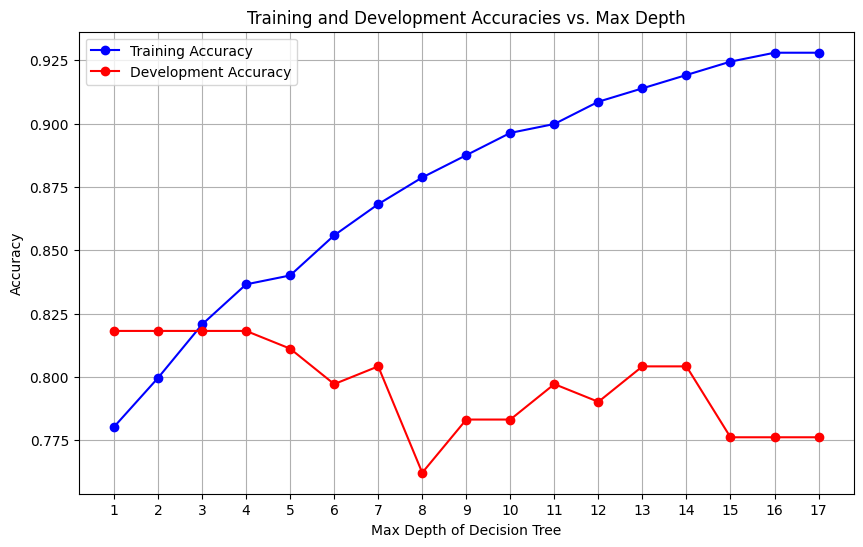

In [ ]:
max_depths = range(1, 18)

train_accuracies = []
dev_accuracies = []

for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_dev_pred = model.predict(X_dev)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    dev_accuracy = accuracy_score(y_dev, y_dev_pred)
    
    train_accuracies.append(train_accuracy)
    dev_accuracies.append(dev_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.plot(max_depths, dev_accuracies, marker='o', linestyle='-', color='r', label='Development Accuracy')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Training and Development Accuracies vs. Max Depth')
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.show()

### Analysis
Training accuracy - Line continualy increases as the depth of pruning increases. This indicates that the model is overfitting the data and isn't effectively learning for unseen data. 

Development accuracy - is consistently at around 81% (Lower than expressed in plots of decision trees). This may suggest overfitting in the specific decison trees compared the aggregate scores presented in the Training vs development plot. 

The development data accuracy declines as depth increases, with the lowest accuracy at depth = 8. This additional complexity of the trees at each increased depth may impact the accuracy of categorisation of each category.



# Ensemble methods


## Bagged model

In [43]:
# Hyperparameter tuning - Bagged model.

bagged_model = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
# Identify n_estimators value.
parameter = {
    'n_estimators': [10,25,30,50,100,200],
}

grid_search = GridSearchCV(estimator=bagged_model, param_grid=parameter, cv = 3,
                            n_jobs=-1,verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_estimators = grid_search.best_params_['n_estimators']
print(grid_search.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'n_estimators': 10}


In [28]:
# Train bagged model. 
final_bagged_model = BaggingClassifier(estimator=DecisionTreeClassifier(), 
                                       n_estimators=n_estimators, random_state=42)
final_bagged_model.fit(X_train, y_train)

# Prediction
y_pred_bagged = final_bagged_model.predict(X_test)

# Evaluate
accuracy_bagged = accuracy_score(y_test, y_pred_bagged)
print(f'Bagged tree model accuracy: {accuracy_bagged}')

Bagged tree model accuracy: 0.7877094972067039


## Random forest

In [45]:
# Hyperparemeter tuning - Random forest. 
random_f_model = RandomForestClassifier(random_state=42)

parameter = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [1,5,10,20,50,100],
    'n_estimators': [10,25,30,50,100,200],
    'max_features': [1,2,3,6,10]
}

grid_search = GridSearchCV(estimator=random_f_model, param_grid=parameter, cv = 3, 
                           n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
best_features= grid_search.best_params_['max_features']
best_min_leaf= grid_search.best_params_['min_samples_leaf']
best_estimators= grid_search.best_params_['n_estimators']
best_max_depth= grid_search.best_params_['max_depth']


Fitting 3 folds for each of 900 candidates, totalling 2700 fits
{'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'n_estimators': 30}


In [22]:
grid_search.best_estimator_
# max_depth=5, max_feature=3, n_estimators=30

RandomForestClassifier(max_depth=5, max_features=3, n_estimators=30,
                       random_state=42)

In [49]:
final_random_f = RandomForestClassifier(n_estimators=30, random_state=42)
final_random_f.fit(X_train, y_train)

# Prediction
y_pred_forest = final_random_f.predict(X_test)

# Evaluate
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f'Random forest tree model accuracy: {accuracy_forest}')

Random forest tree model accuracy: 0.8044692737430168


## Boosted model

In [ ]:
booster_model = GradientBoostingClassifier(random_state=42)

parameter = {
    'min_samples_leaf': [1,5,10,20,50,100],
    'n_estimators': [10,25,30,50,100,200],
    'max_features': [1,2,3,6,10]
}

grid_search = GridSearchCV(estimator=booster_model, param_grid=parameter, cv = 3,
                            n_jobs=-1,verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_estimators = grid_search.best_params_['n_estimators']
